# Exam Project | Face Recognizer
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

## The Content
## The Theory
## The Source

In [1]:
import sys
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

sys.path.append('../')
from FaceDetector import FaceDetector
from DataGenerator import DataGenerator
from Utilities import Displayer

In [2]:
classes = ['dad', 'mom']
dad_path = '../data/face-data/PersonGroup/Family3-Man'
mom_path = '../data/face-data/PersonGroup/Family3-Lady'

(train_dad_data, test_dad_data) = DataGenerator.generate(dad_path, 100, label=0, test_size=.2)
(train_mom_data, test_mom_data) = DataGenerator.generate(mom_path, 100, label=1, test_size=.2)

(train_images, train_labels) = DataGenerator.merge_shuffle([train_dad_data, train_mom_data])
(test_images, test_labels) = DataGenerator.merge_shuffle([test_dad_data, test_mom_data])

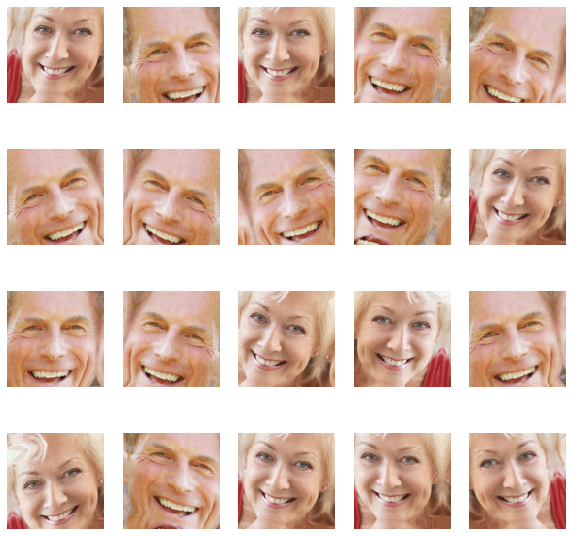

In [3]:
Displayer.images(test_images, 20)

In [4]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    Dropout(.2),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'), # softmax no go
    Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

In [5]:
loss_func = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])

In [6]:
train_images = np.array([image/255 for image in train_images], dtype=np.float32)
train_images = np.asarray(train_images)

test_images = np.array([image/255 for image in test_images], dtype=np.float32)
test_images = np.asarray(test_images)

train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

print('train images shape', train_images.shape)
print('test images shape', test_images.shape, '\n')

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

train images shape (480, 100, 100, 3)
test images shape (120, 100, 100, 3) 

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 22s 45ms/sample - loss: 0.7567 - accuracy: 0.5312 - val_loss: 0.6802 - val_accuracy: 0.7833
Epoch 2/10
480/480 [==============================] - 18s 38ms/sample - loss: 0.5583 - accuracy: 0.6979 - val_loss: 0.4764 - val_accuracy: 0.7667
Epoch 3/10
480/480 [==============================] - 18s 37ms/sample - loss: 0.3763 - accuracy: 0.8354 - val_loss: 0.2627 - val_accuracy: 0.9250
Epoch 4/10
480/480 [==============================] - 17s 35ms/sample - loss: 0.2517 - accuracy: 0.8896 - val_loss: 0.3093 - val_accuracy: 0.8667
Epoch 5/10
480/480 [==============================] - 17s 35ms/sample - loss: 0.1446 - accuracy: 0.9583 - val_loss: 0.1786 - val_accuracy: 0.9250
Epoch 6/10
480/480 [==============================] - 16s 34ms/sample - loss: 0.0549 - accuracy: 0.9854 - val_loss: 0.1471 - val_accuracy: 0.9667
E

120/1 - 1s - loss: 0.0391 - accuracy: 0.9750


[0.07590973012459774, 0.975]

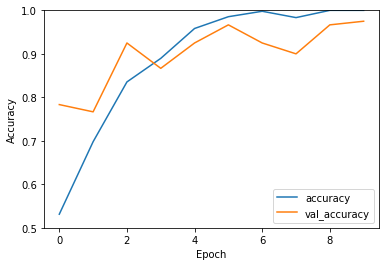

In [7]:
Displayer.acc_history(history)
model.evaluate(test_images, test_labels, verbose=2)

In [16]:
# model.save('../models/sequential_model_acc98.h5')
# model = tf.keras.models.load_model('../models/sequential_model.h5')

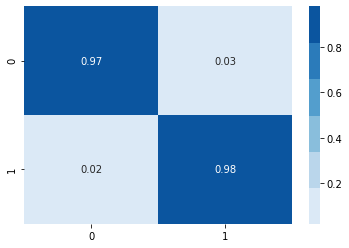

In [9]:
# ...
predictions = model.predict(test_images)
Displayer.conf_matrix(predictions, test_labels)

predictions [[ 2.2407277 13.747563 ]]
prediction mom


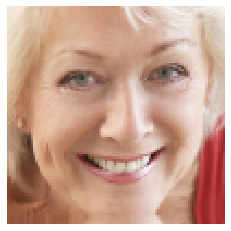

In [10]:
image_index = 30
image = np.array([test_images[image_index]], dtype='float32')

predictions = model.predict(image)
prediction = np.argmax(predictions)

print('predictions', predictions)
print('prediction', classes[prediction])
Displayer.image(test_images[image_index])

___

In [11]:
image_path = '../data/face-data/identification3.jpg'
test_image = cv2.imread(image_path)

faceDetector = FaceDetector('FACE_DEFAULT')
new_test_images = faceDetector.crop_all(test_image)

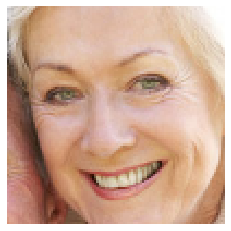

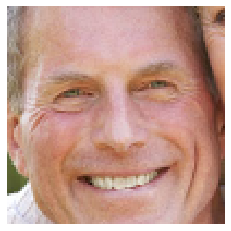

In [12]:
for image in new_test_images:
    Displayer.image(image)

In [13]:
images = np.array(new_test_images, dtype=np.float32) 
images = np.array([image/255 for image in images], dtype=np.float32)

In [14]:
predictions = model.predict(images)
print(predictions)

[[ 5.0563912  1.6888531]
 [ 7.7068396 -9.373047 ]]
